# Import the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib as plt
%matplotlib inline

# Import the dataset 

In [4]:
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


# Use pandas to get some insights into the data 

In [3]:
df.head(10)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
5,1127.886,11,12,4,2,2,148000
6,1352.040,5,7,3,2,1,58000
7,757.854,5,14,1,0,1,48000
8,1152.792,10,12,3,2,2,45000
9,1423.200,4,5,4,2,2,65000


In [14]:
df.tail(10)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
635,1889.298,18,21,3,2,2,70000
636,1266.648,6,7,3,2,2,40000
637,1707.840,9,9,4,2,2,60000
638,1707.840,9,15,3,2,2,80000
639,2846.400,5,12,4,2,2,138888
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000
644,1376.946,6,7,3,2,1,36000


In [16]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [17]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [24]:
df.shape
print('Shape of:',df.shape)

Shape of: (645, 7)


In [25]:
df.size
print('Size of:',df.size)

Size of: 4515


In [31]:
df.rename(columns = {'Living.Room' : 'Living_Room'})

,Sqft,Floor,TotalFloor,Bedroom,Living_Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [5]:
df.reset_index(drop = True)
df = df.loc[:,~df.columns.str.contains('^Unnamed')]
print(df)

         Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  Price
0    1177.698      2           7        2            2         2  62000
1    2134.800      5           7        4            2         2  78000
2    1138.560      5           7        2            2         1  58000
3    1458.780      2           7        3            2         2  45000
4     967.776     11          14        3            2         2  45000
..        ...    ...         ...      ...          ...       ...    ...
640  1359.156      7          15        3            2         2  45000
641   377.148      4          10        1            1         1  24800
642   740.064     13          14        1            1         1  45000
643  1707.840      3          14        3            2         2  65000
644  1376.946      6           7        3            2         1  36000

[645 rows x 7 columns]


In [6]:
df.isnull().count()

Sqft           645
Floor          645
TotalFloor     645
Bedroom        645
Living.Room    645
Bathroom       645
Price          645
dtype: int64

In [8]:
df['Sqft'].value_counts()

711.600     21
925.080     13
2134.800    11
1707.840    10
2063.640    10
            ..
1106.538     1
882.384      1
665.346      1
1209.720     1
1376.946     1
Name: Sqft, Length: 288, dtype: int64

In [9]:
df['TotalFloor'].value_counts()

7     161
12    113
14     68
4      36
6      36
9      30
5      30
13     30
15     28
21     18
19     17
11     16
16     13
25     10
17      8
18      8
10      8
24      4
8       3
20      2
27      2
3       1
38      1
26      1
1       1
Name: TotalFloor, dtype: int64

In [10]:
print('Number of columns :', len(df.columns))

Number of columns : 7


# Show some interesting visualization of the data

<AxesSubplot:>

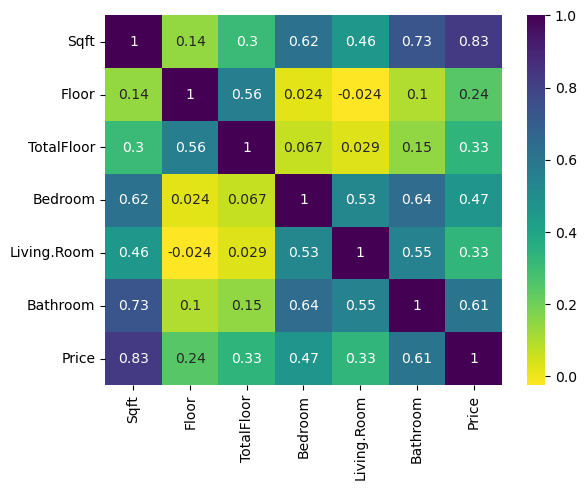

In [33]:
sns.heatmap(df.corr(), annot = True,cmap=plt.cm.get_cmap('viridis_r'))

<AxesSubplot:xlabel='Price', ylabel='Sqft'>

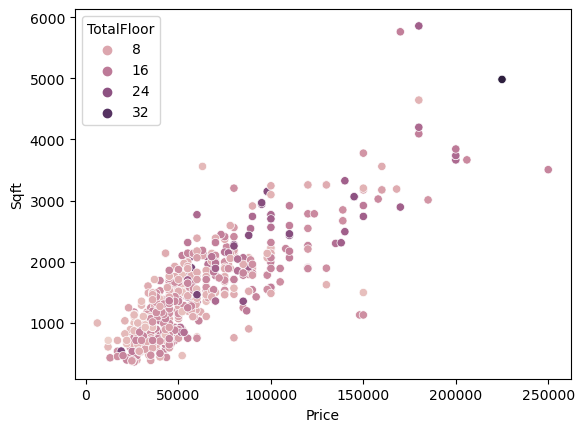

In [14]:
sns.scatterplot(data = df, x = df['Price'], y = df['Sqft'], hue = 'TotalFloor')

C:\Users\91786\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalFloor', ylabel='Density'>

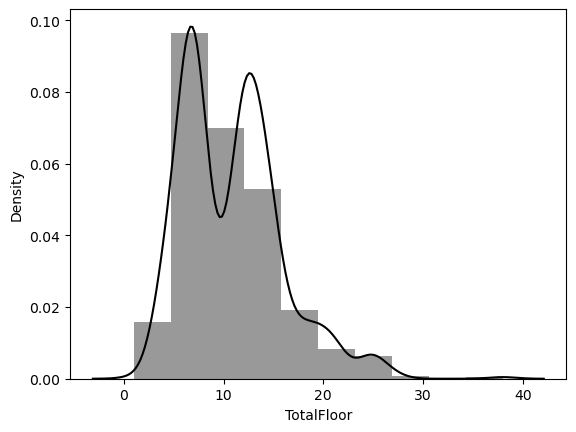

In [31]:
sns.distplot(df['TotalFloor'], kde = True, color = 'black',bins = 10)

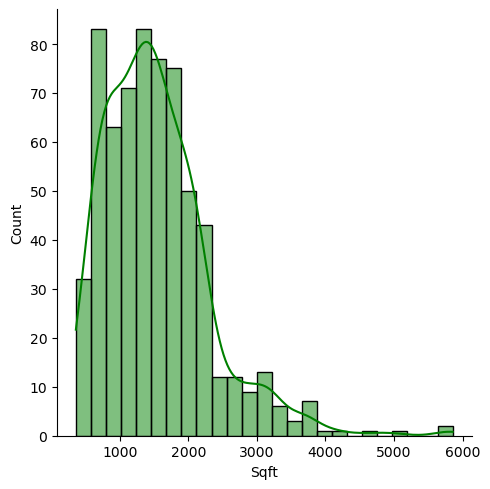

In [32]:
sns.displot(df['Sqft'],kde = True,color = 'g')

<AxesSubplot:xlabel='Sqft', ylabel='Living.Room'>

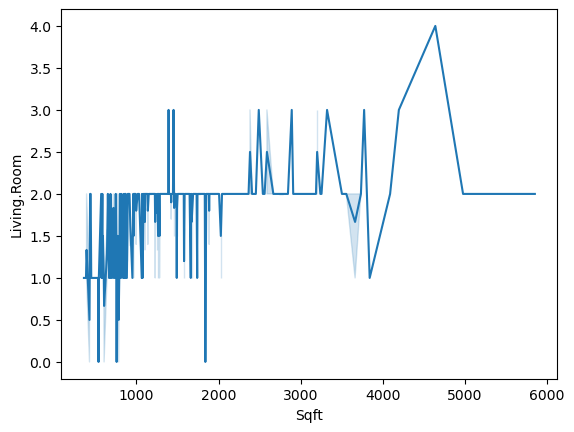

In [39]:
sns.lineplot(x = df["Sqft"], y = df["Living.Room"])

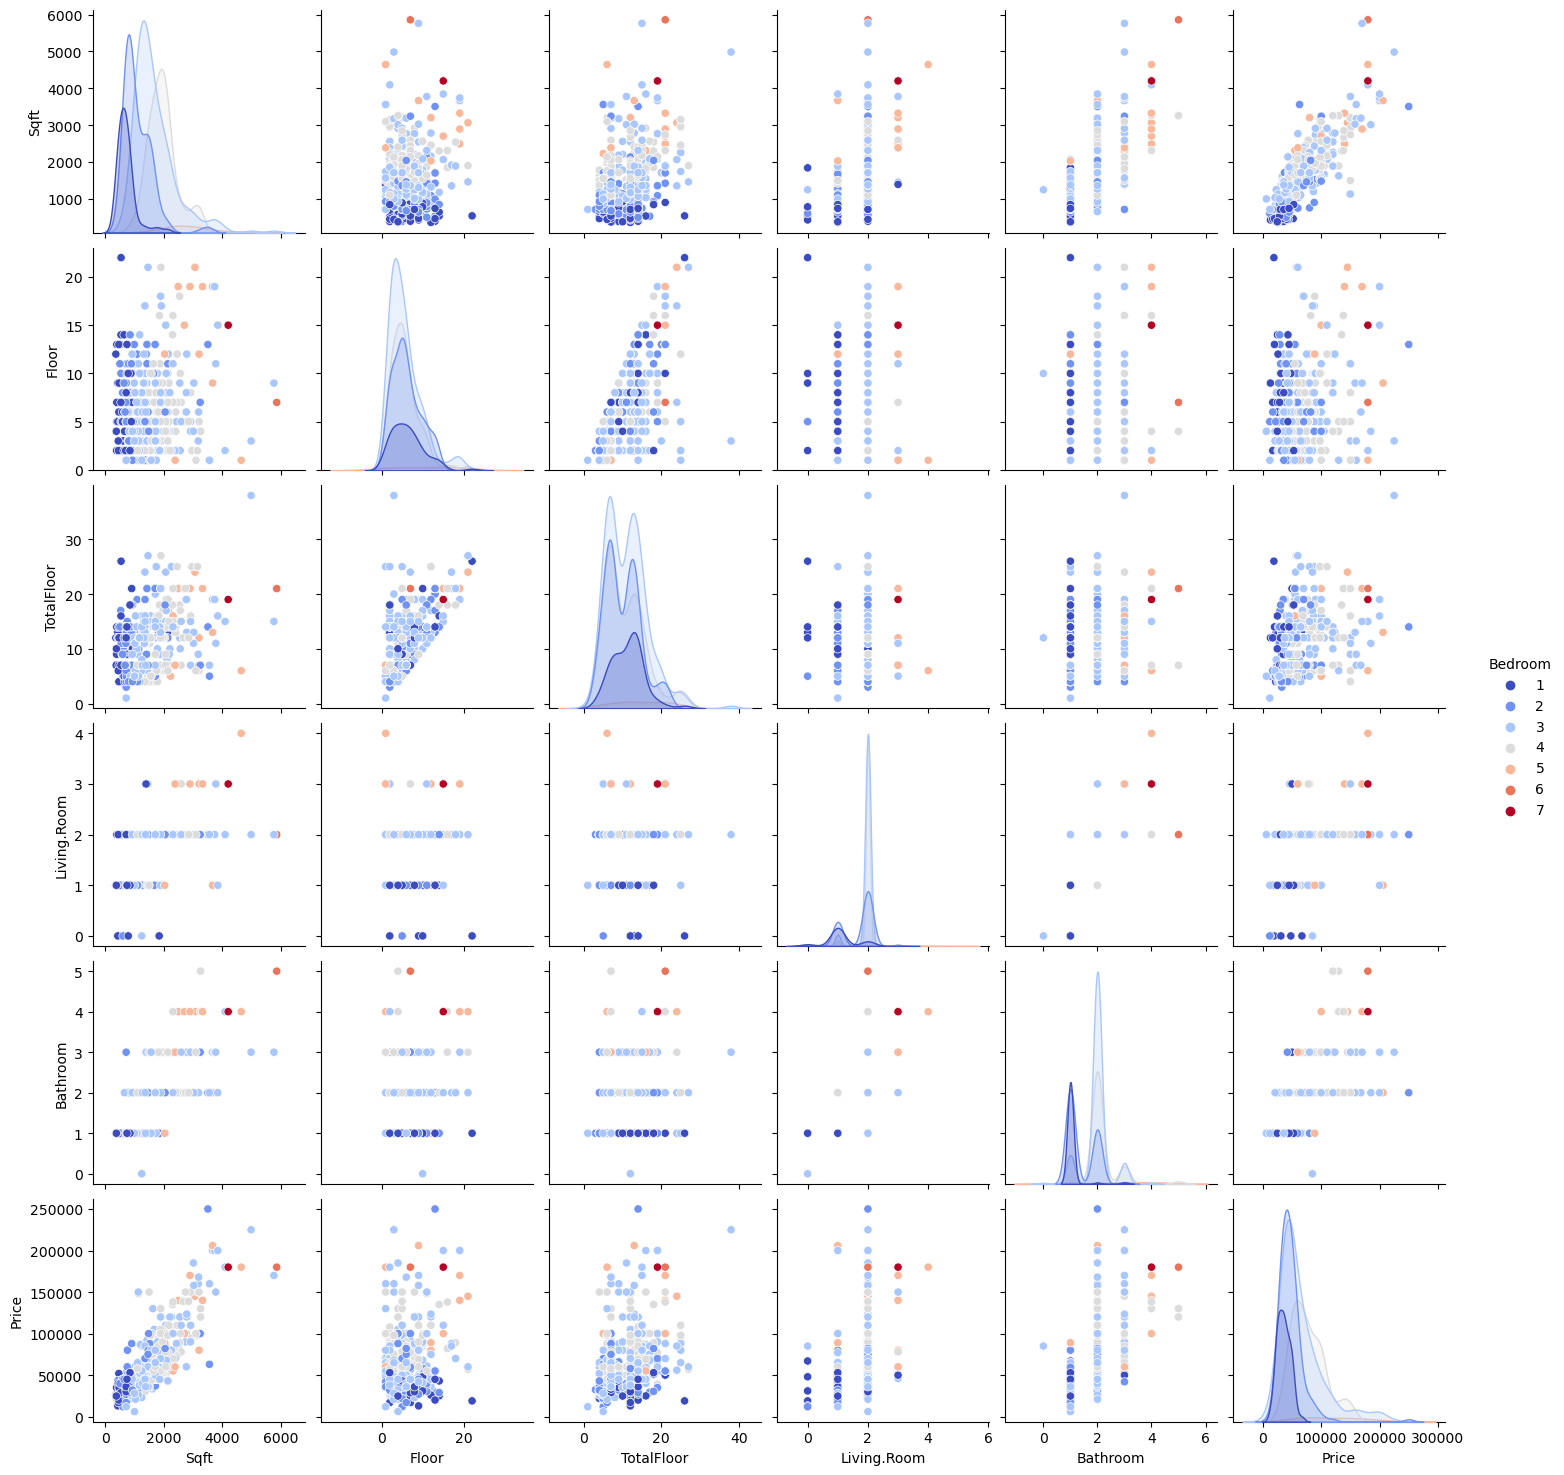

In [41]:
sns.pairplot(data = df,hue = 'Bedroom', palette = 'coolwarm')

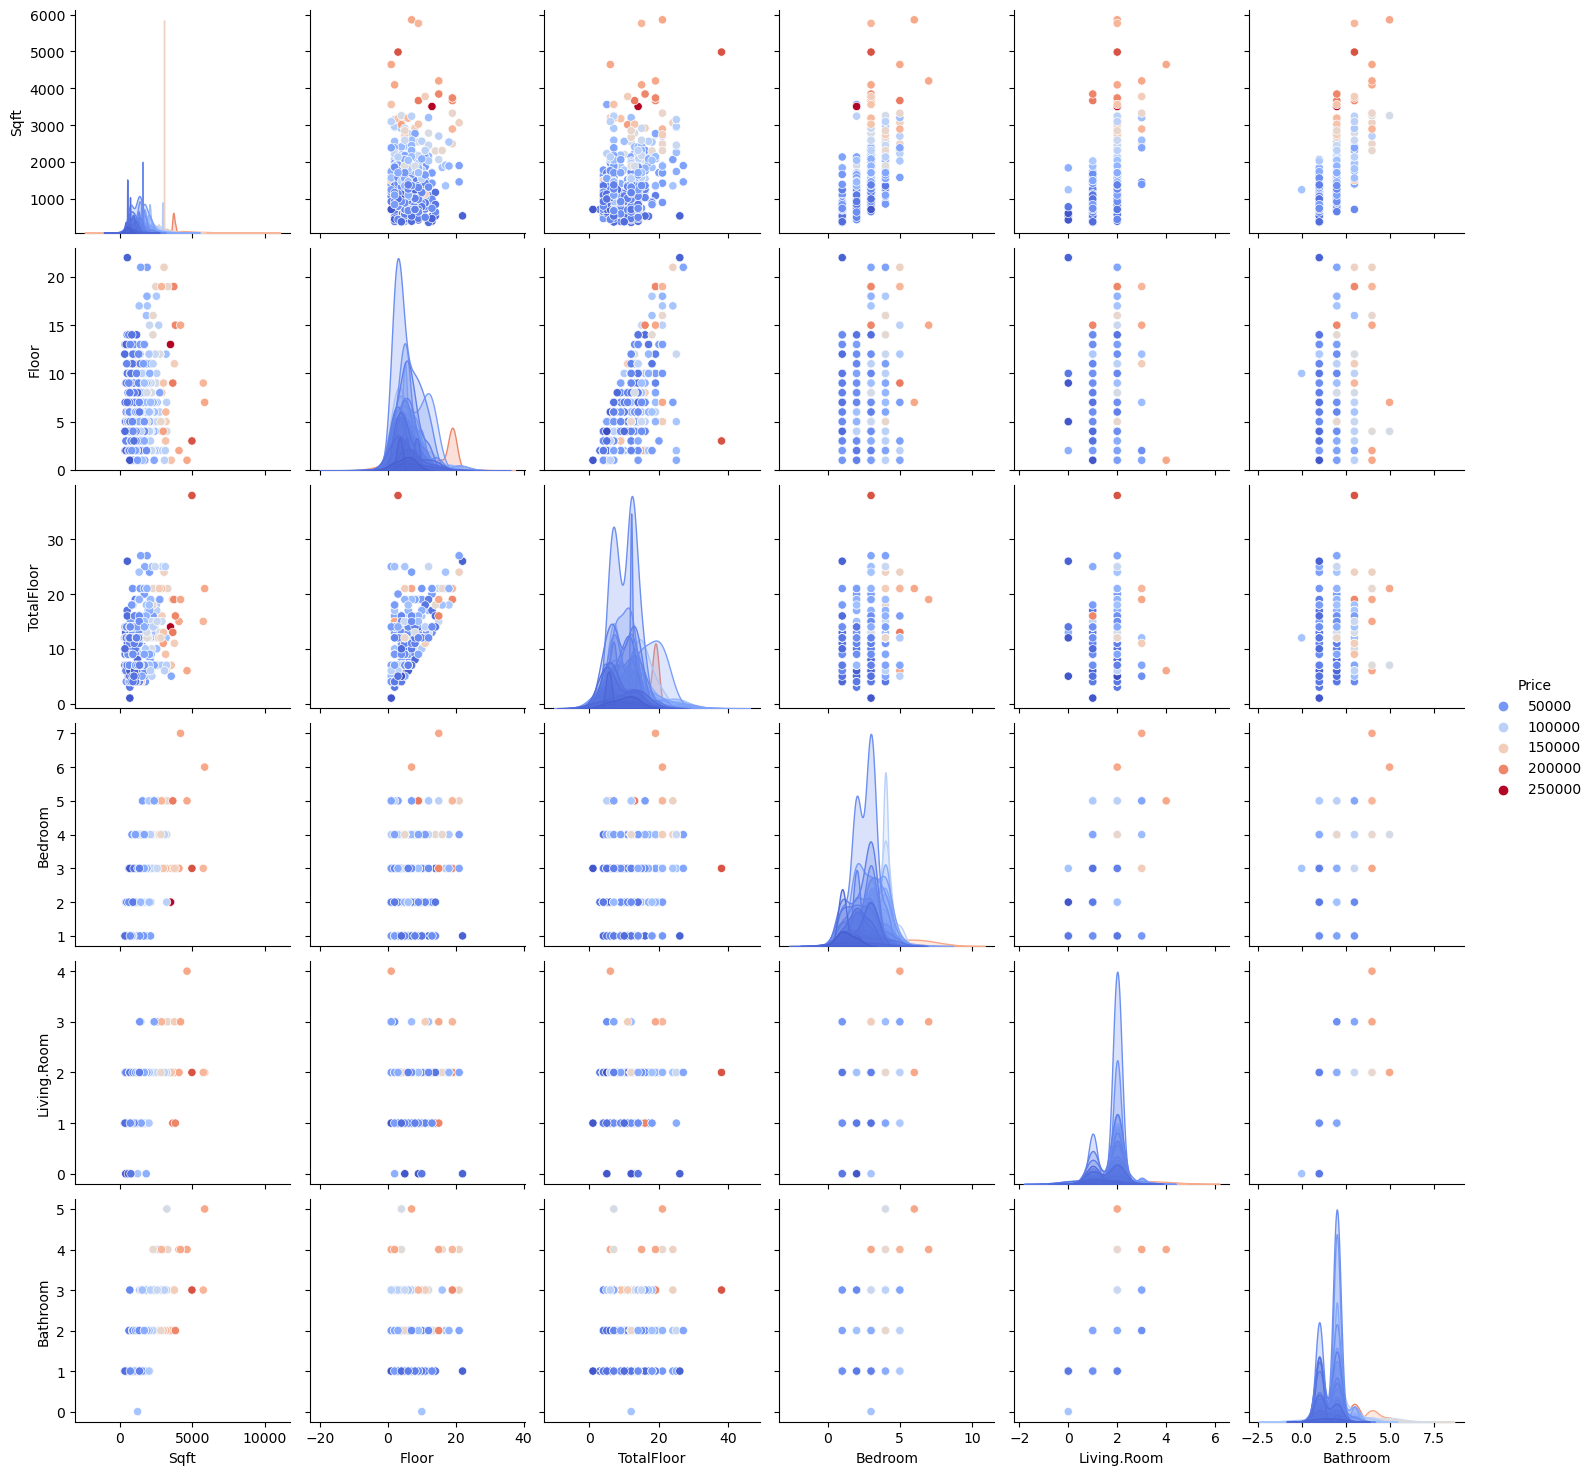

In [42]:
sns.pairplot(data = df,hue = "Price",palette = 'coolwarm')

# Manage data for training & testing 

In [14]:
from scipy import stats
X = np.abs(stats.zscore(df))
print(X)

     Unnamed: 0      Sqft     Floor  TotalFloor   Bedroom  Living.Room  \
0      1.731929  0.456393  1.014897    0.772347  0.828956     0.402694   
1      1.726586  0.791798  0.242042    0.772347  1.151328     0.402694   
2      1.721243  0.507434  0.242042    0.772347  0.828956     0.402694   
3      1.715900  0.089824  1.014897    0.772347  0.161186     0.402694   
4      1.710557  0.730160  1.303669    0.629803  0.161186     0.402694   
..          ...       ...       ...         ...       ...          ...   
640    1.703508  0.219747  0.273195    0.830110  0.161186     0.402694   
641    1.708851  1.500419  0.499660    0.171426  1.819099     1.761785   
642    1.714194  1.027127  1.818907    0.629803  1.819099     1.761785   
643    1.719537  0.234984  0.757279    0.629803  0.161186     0.402694   
644    1.724879  0.196547  0.015577    0.772347  0.161186     0.402694   

     Bathroom     Price  
0    0.276918  0.000370  
1    0.276918  0.449714  
2    1.187117  0.111966  
3    0.

In [16]:
X = df.drop(labels = ['Price'], axis = 1)
y = df['Price']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [11]:
scaler = MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [25]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

In [27]:
rmse = []
for k in range(1,21):
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(error)
    print('RMSE for k = ',k,'is',error)

RMSE for k =  1 is 25537.221558241778
RMSE for k =  2 is 20992.972224665602
RMSE for k =  3 is 20314.82949794502
RMSE for k =  4 is 18717.29517872855
RMSE for k =  5 is 17627.142916158213
RMSE for k =  6 is 17672.096571497757
RMSE for k =  7 is 16915.808632677246
RMSE for k =  8 is 16836.34834354107
RMSE for k =  9 is 17172.655591690534
RMSE for k =  10 is 17315.589600401567
RMSE for k =  11 is 17536.1978290023
RMSE for k =  12 is 17417.04879495768
RMSE for k =  13 is 17337.02998794617
RMSE for k =  14 is 17331.91051833556
RMSE for k =  15 is 17256.791200938813
RMSE for k =  16 is 17334.537979807337
RMSE for k =  17 is 17397.30370649434
RMSE for k =  18 is 17758.38158960582
RMSE for k =  19 is 17672.33230126365
RMSE for k =  20 is 17584.75968873838


<AxesSubplot:>

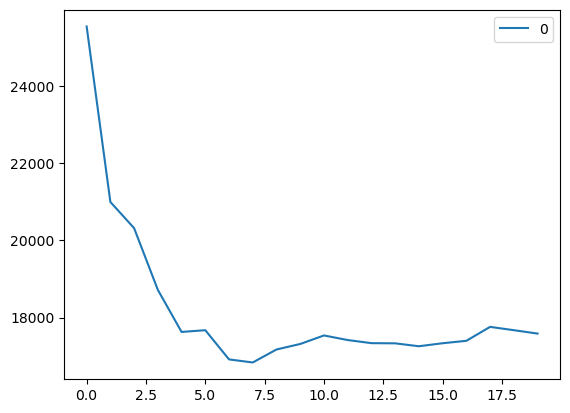

In [26]:
curve = pd.DataFrame(rmse)
curve.plot()